In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
df = pd.read_csv("train.csv")

In [4]:
for column in df.columns: #replace NaN by random data
    df[column] = df[column].fillna(np.random.choice(df[column].unique()))
    
ncols = df.columns[1:-3]
df[ncols] = df[ncols].apply(lambda x: (x-x.min())/(x.max()-x.min())) #normalizing
norm = df
norm

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


In [5]:
from sklearn.preprocessing import LabelEncoder#encoding 
cols = norm.columns[-3::]
le = LabelEncoder()
norm[cols] = norm[cols].apply(lambda col: le.fit_transform(col))
enc=norm[norm.columns[1::]]
enc


,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0


In [6]:

new = enc.copy()#removing outliers
new=new[['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score','customer_active_segment','X1','customer_category']]
new = new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]
new

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10732,0.301578,0.327601,0.183398,0.022250,0.004592,0.113201,0.380645,0.058437,3,0,0
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0


In [8]:
X = new[new.columns[1:-1]]#applying Random Forest classifier
y = new['customer_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [9]:
p=metrics.precision_score(y_test, y_pred,zero_division='warn')#for each class print: precision, recall, accuracy

r=metrics.recall_score(y_test, y_pred,zero_division='warn')

a=metrics.accuracy_score(y_test, y_pred)

In [10]:
print("Precision:")
p

Precision:


0.917098445595855

In [11]:
print("Recall:")
r

Recall:


0.7564102564102564

In [12]:
print("Accuracy:")
a

Accuracy:


0.9737410071942446

In [13]:
sel = SelectFromModel(RandomForestClassifier())#improve Random Forest classification accuracy by applying Feature Selection algorithms
sel.fit(X_train, y_train)
selected_feat= X_train[X_train.columns[(sel.get_support())]]
print(selected_feat)
classifier_2 = RandomForestClassifier()
classifier_2.fit(X_train, y_train)
y2_pred = classifier_2.predict(X_test)
print(sel.get_support())



       customer_ctr_score  customer_stay_score
593              0.186002             0.032160
8972             0.165763             0.027058
10700            0.187393             0.028335
3285             0.162324             0.026280
3450             0.275784             0.073026
...                   ...                  ...
4641             0.196306             0.047030
327              0.206711             0.032067
1239             0.160995             0.028448
5259             0.186667             0.026225
296              0.167639             0.029281

[6486 rows x 2 columns]
[False  True  True False False False False False False]


In [14]:
a2=metrics.accuracy_score(y_test, y2_pred)
print("Accuracy after applying feature selection:")
a2

Accuracy after applying feature selection:


0.9733812949640288

In [18]:
rf = RandomForestClassifier()#improving result by searching best parameters
p = {'n_estimators': [10, 100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [2, 5, 7, 10,  None],'min_samples_split': [2, 3, 4, 5],'min_samples_leaf': [1, 2, 3, 4, 5]}
search = RandomizedSearchCV(rf, p, random_state=0)
search.fit(X, y)
best_params = randsearch.best_params_
print(best_params)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 7}


In [20]:
improved = RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=4, max_depth=7)
improved.fit(X_train, y_train)
impred = improved.predict(X_test)
print("Improved accuracy: ")
print(metrics.accuracy_score(y_test, impred))

Improved accuracy: 
0.9741007194244604


In [42]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
nb = GaussianNB()
nb.fit(X_train, y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
log = LogisticRegression()
log.fit(X_train, y_train)



LogisticRegression()

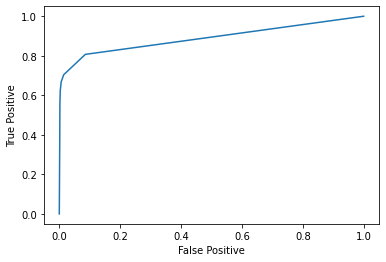

0.8888218571721698


In [53]:
y1_pr = knn.predict_proba(X_test)[::,1]#KNeighborsClassifier
fpr, tpr, thresholds = metrics.roc_curve(y_test, y1_pr)
auc = metrics.roc_auc_score(y_test, y1_pr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print(auc)

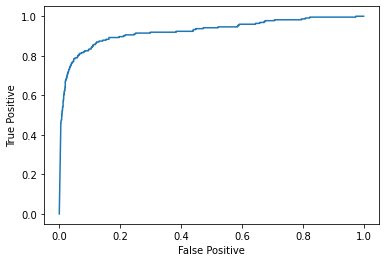

0.924627024031455


In [43]:
y2_pr = nb.predict_proba(X_test)[::,1]#GaussianNB
fpr, tpr, thresholds = metrics.roc_curve(y_test, y2_pr)
auc = metrics.roc_auc_score(y_test, y2_pr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print(auc)

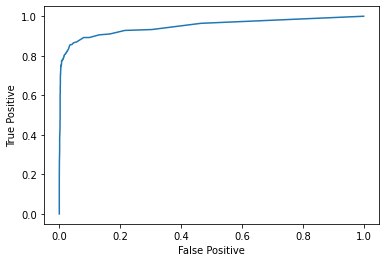

0.9494450299976676


In [45]:
y3_pr = clf.predict_proba(X_test)[::,1]#RandomForestClassifier
fpr, tpr, thresholds = metrics.roc_curve(y_test, y3_pr)
auc = metrics.roc_auc_score(y_test, y3_pr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print(auc)

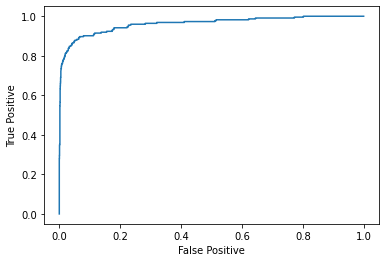

0.9620289682240434


In [46]:
y4_pr = svm.predict_proba(X_test)[::,1]#SVC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y4_pr)
auc = metrics.roc_auc_score(y_test, y4_pr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print(auc)

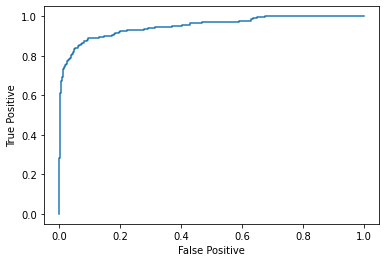

0.9502201816520551


In [47]:
y5_pr = log.predict_proba(X_test)[::,1]#LogisticRegression
fpr, tpr, thresholds = metrics.roc_curve(y_test, y5_pr)
auc = metrics.roc_auc_score(y_test, y5_pr)
plt.plot(fpr,tpr)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()
print(auc)

In [94]:
sub=new.iloc[1:7500, 2:11]#choose the best classifier based on only results on my subset


In [90]:
sub=knn
sub.fit(X_train, y_train)
acc = sub.predict(X_test)
print("accuracy: ")
print(metrics.accuracy_score(y_test, acc))

accuracy: 
0.725


In [91]:
sub=clf
sub.fit(X_train, y_train)
acc = sub.predict(X_test)
print(" accuracy: ")
print(metrics.accuracy_score(y_test, acc))

 accuracy: 
0.675


In [92]:
sub=nb
sub.fit(X_train, y_train)
acc = sub.predict(X_test)
print(" accuracy: ")
print(metrics.accuracy_score(y_test, acc))

 accuracy: 
0.825


In [93]:
sub=svm
sub.fit(X_train, y_train)
acc = sub.predict(X_test)
print("accuracy: ")
print(metrics.accuracy_score(y_test, acc))

accuracy: 
0.75


In [88]:
sub=log
sub.fit(X_train, y_train)
acc = sub.predict(X_test)
print("Improved accuracy: ")
print(metrics.accuracy_score(y_test, acc))

Improved accuracy: 
0.75
